In [ ]:
import yfinance as yf
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as  plt
from pandas_datareader import data as pdr

In [ ]:
yf.pdr_override() # <== that's all it takes :-)

In [ ]:
ticker = 'AAPL'

In [ ]:
enddate = dt.datetime.now()

In [ ]:
startdate = dt.datetime.now() - relativedelta(years=1)

In [ ]:
df = pdr.get_data_yahoo(ticker, start=startdate, end=enddate)

In [ ]:
df

In [ ]:
change = df['Adj Close'].diff(1)

In [ ]:
change.dropna(inplace=True)

In [ ]:
gain = change.copy()

In [ ]:
loss = change.copy()

In [ ]:
gain[gain < 0] = 0

In [ ]:
loss[loss > 0] = 0

In [ ]:
days=14

In [ ]:
average_gain = gain.rolling(window=days).mean()

In [ ]:
average_loss = abs(loss.rolling(window=days).mean())

In [ ]:
relative = average_gain/average_loss

In [ ]:
RSI = 100.0 - (100.0/(1.0+relative))

In [ ]:
RSI

In [ ]:
combined = pd.DataFrame()

In [ ]:
combined['Adj Close']= df['Adj Close']

In [ ]:
combined['RSI'] = RSI

In [ ]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'], color='lightgray')
ax1.set_title("Adjusted Close Price", color='white')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

In [ ]:
plt.figure(figsize=(12,8))
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='lightgray')
ax2.set_title("RSI", color='white')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.figure.set_facecolor('#121212')
ax2.axhline(30, linestyle='solid', color='red')
ax2.axhline(70, linestyle='solid', color='green')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

In [10]:
from main import get_rsi

[*********************100%***********************]  1 of 1 completed


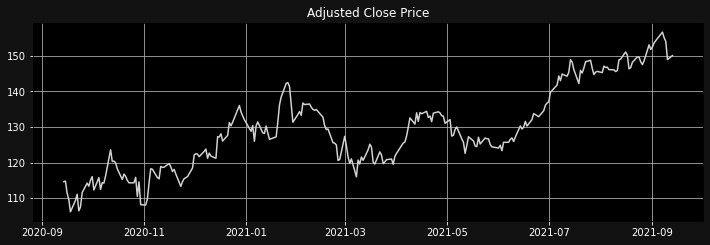

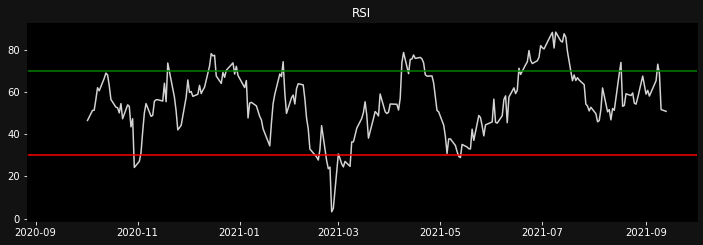

In [12]:
get_rsi('AAPL')